In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#path to data
path = 'data/'

In [24]:
#stocks to assess in the portfolio analysis
stocks = ['AAPL', 'TSLA', 'GOOGL', 'NVDA', 'ZI', 'AMGN', 'INTC']

In [25]:
df = pd.DataFrame(columns=['date'])

for ticker in stocks:
    data = pd.read_csv(path+ticker+'.csv')
    print(data.shape)
    df = pd.merge(df, data[['date', 'close']], on='date', how='outer', suffixes=(ticker, ticker))

#rename column names with Ticker values
df.columns = ['date'] + [i for i in stocks]


(11019, 6)
(3566, 6)
(5040, 6)
(6441, 6)
(1065, 6)
(10384, 6)
(13265, 6)


In [26]:
df

,date,AAPL,TSLA,GOOGL,NVDA,ZI,AMGN,INTC
0,1980-12-12,0.13,NaN,NaN,NaN,NaN,NaN,0.300155
1,1980-12-15,0.12,NaN,NaN,NaN,NaN,NaN,0.300155
2,1980-12-16,0.11,NaN,NaN,NaN,NaN,NaN,0.300155
3,1980-12-17,0.12,NaN,NaN,NaN,NaN,NaN,0.293210
4,1980-12-18,0.12,NaN,NaN,NaN,NaN,NaN,0.293210
...,...,...,...,...,...,...,...,...
13260,1980-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.300155
13261,1980-12-08,NaN,NaN,NaN,NaN,NaN,NaN,0.293210
13262,1980-12-09,NaN,NaN,NaN,NaN,NaN,NaN,0.300155
13263,1980-12-10,NaN,NaN,NaN,NaN,NaN,NaN,0.300155


<Axes: >

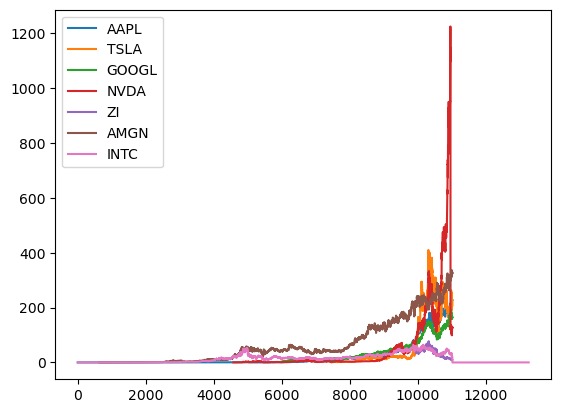

In [28]:
df[stocks].plot()